In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset loading

In [2]:
data=pd.read_excel('iris1.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Preprocessing

In [9]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

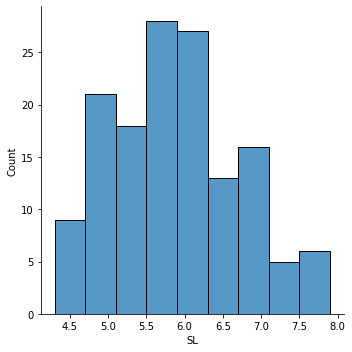

In [10]:
sns.displot(data['SL'])
plt.show()

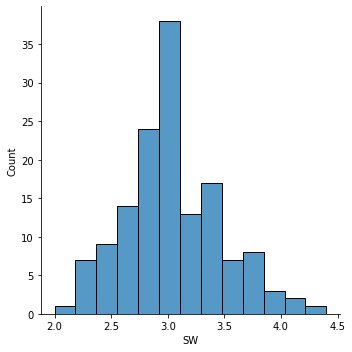

In [11]:
sns.displot(data['SW'])
plt.show()

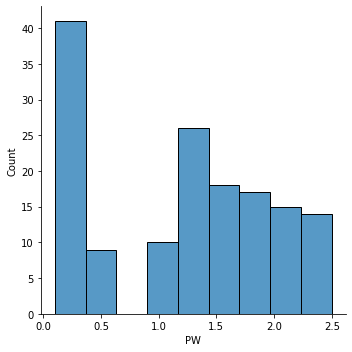

In [12]:
sns.displot(data['PW'])
plt.show()

In [13]:
##Missing value handling

In [14]:
SL_median = data['SL'].median()
data['SL'] = data['SL'].fillna(SL_median)

SL_median = data['SW'].median()
data['SW'] = data['SW'].fillna(SL_median)

SL_median = data['PL'].median()
data['PL'] = data['PL'].fillna(SL_median)

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Preparation and splitting

In [16]:
inde_fe=['SL', 'SW', 'PL', 'PW']
x=data[inde_fe]
y=data['Classification']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [19]:
x_train.describe()

,SL,SW,PL,PW
count,120.000000,120.000000,120.000000,120.000000
mean,5.801667,3.037500,3.731250,1.186667
std,0.778814,0.418091,1.690371,0.747088
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.300000,3.225000,5.000000,1.800000
max,7.900000,4.200000,6.700000,2.500000


# Model building

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(accuracy_score(y_test,y_pred_lr))

0.9333333333333333


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  1,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred_lr)

0.9333333333333333

In [24]:
from sklearn.model_selection import cross_validate
cvs_lr=cross_validate(lr,x,y,cv=5)
cvs_lr['test_score'].mean()

0.9466666666666667

# DecisionTree classifier Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.9666666666666667

In [26]:
cvs_dt=cross_validate(dt,x,y,cv=5)
cvs_dt['test_score'].mean()

0.9466666666666667

# Random Forest Classifier model

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.9666666666666667

In [28]:
cvs_rf=cross_validate(rf,x,y,cv=5)
cvs_rf['test_score'].mean()

0.96

# KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)

In [30]:
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9666666666666667

In [31]:
lst_acc=[]
neighbors=range(3,20,2)
for i in range(3,20,2):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    lst_acc.append(acc)

In [32]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9666666666666667

In [33]:
cvs_knn=cross_validate(knn,x,y,cv=5)
cvs_knn['test_score'].mean()

0.9533333333333334

# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_test

,SL,SW,PL,PW
73,6.1,2.8,4.70,1.2
18,5.7,3.8,1.70,0.3
118,7.7,2.6,6.90,2.3
78,6.0,2.9,4.50,1.5
76,6.8,2.8,4.80,1.4
31,5.4,3.4,1.50,0.4
64,5.6,2.9,3.60,1.3
141,5.8,3.1,5.10,2.3
68,6.2,2.2,4.50,1.5
82,5.8,2.7,3.90,1.2


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

# Cross validation

In [43]:
from sklearn.model_selection import cross_validate

Logistic regression

In [44]:
cvs_lr=cross_validate(lr,x,y,cv=5)
cvs_lr['test_score'].mean()

0.9466666666666667

Decisiontree classifier

In [45]:
cvs_dt=cross_validate(dt,x,y,cv=5)
cvs_dt['test_score'].mean()

0.9533333333333334

Random forest classifier

In [46]:
cvs_rf=cross_validate(rf,x,y,cv=5)
cvs_rf['test_score'].mean()

0.9666666666666668

KNeighbor classifier

In [47]:
cvs_knn=cross_validate(knn,x,y,cv=5)
cvs_knn['test_score'].mean()

0.9600000000000002

Conclusion - Among the above models both random forest classifier and knn gives good results.When compared between these two random forest classifier marginally fares better than knn.